# Custom Model
We have tried implementing a mixture of feature base model working in a hierarchial way along with slight use of the Inverse document frequency terms used in the LSA to make a model that can generate useful outputs when needed 

In [7]:

import networkx as nx


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
G = nx.DiGraph()

In [10]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def push(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def pop(self):
        if not self.is_empty():
            return heapq.heappop(self.elements)[1]
        else:
            raise IndexError("Priority queue is empty")

    def is_empty(self):
        return len(self.elements) == 0


In [11]:
obs = []


In [12]:
class Node:
    global obs
    level = 0
    children =[]
    
    def __init__(self,name):
        self.name = name
        G.add_node(self.name)
        
    def setChars(self,charsketch):
        self.characterstic = [x for x in charsketch ] 
    
    
    def setParent(self,Parent):
        self.level = Parent.level + 1

        
        self.parent = Parent
        G.add_edge(self.parent.name,self.name)
        self.parent.setChild(self)
        if self.level > len(obs):
            obs.append([self])
        else:
            obs[self.level-1].append(self)
    
    def setChild(self,child):
        self.children.append(child)
        
    

In [13]:
Animal = Node('Animal',)

In [14]:
Bird = Node('Bird')

In [15]:
Bird.setParent(Animal)     

In [16]:
Animal.setChars(['Living','Reproduce','Eat','Survive'])

In [17]:
Bird.setChars(['Fly','Have Feathers','Chirp'])

In [18]:
Mammals = Node('Mammals')

In [19]:
Mammals.setParent(Animal)
Mammals.setChars(['Have Fur','Produce Milk','Give Birth to Children'])

In [20]:
Canary = Node('Canary')
Canary.setParent(Bird)
Canary.setChars(['Yellow' , "beautiful" , 'Light'])

In [21]:
Bat = Node('Bat')
Bat.setParent(Mammals)
Bat.setChars(['Nightime' ,'Can fly' , 'Detects objects via Sound'])

In [22]:
Bird.level

1

In [23]:
Animal.level

0

In [24]:
Bat.level

2

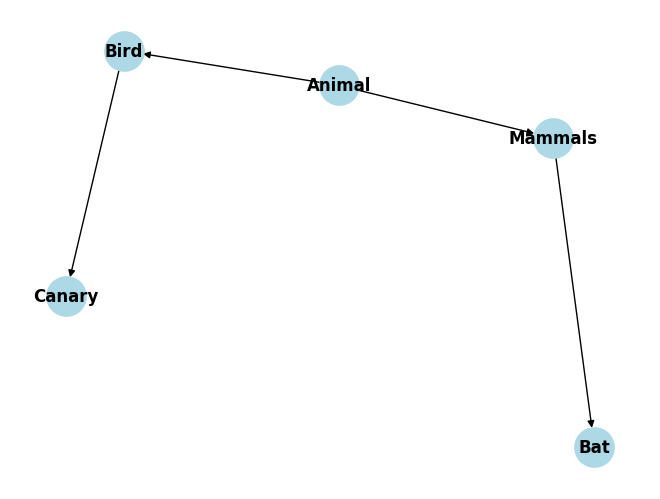

In [25]:
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=800)
plt.show()

obs

obs

In [26]:
ip = ['Ostrich has feathers But it cannot fly ']

In [35]:
cat = input("Category")
for j in range(0,len(obs)):
    for o in obs[j]:
        if o.name == cat:
            break


b = pd.DataFrame()
for node in obs[j]:
    p = node
    a= pd.DataFrame(node.characterstic)
    for i in range(0,j+1):
        
        a[f'Label{i}'] = p.name
        p = p.parent
        
    b= pd.concat([b,a],axis=0,ignore_index=True)
    b[f'Label{i+1}'] = p.name
        

In [36]:
b

,0,Label0,Label1,Label2
0,Yellow,Canary,Bird,Animal
1,beautiful,Canary,Bird,Animal
2,Light,Canary,Bird,Animal
3,Nightime,Bat,Mammals,Animal
4,Can fly,Bat,Mammals,Animal
5,Detects objects via Sound,Bat,Mammals,Animal


In [29]:
a= pd.DataFrame(Bird.characterstic)
a[f'Label{Bird.level}'] = Bird.name
a

,0,Label1
0,Fly,Bird
1,Have Feathers,Bird
2,Chirp,Bird


In [30]:
b= pd.DataFrame(Mammals.characterstic)
b[f'Label{Mammals.level}'] = Mammals.name
b

,0,Label1
0,Have Fur,Mammals
1,Produce Milk,Mammals
2,Give Birth to Children,Mammals


In [31]:
x= pd.concat([a,b],axis=0,ignore_index=True)

In [32]:
x[0]+','+x['Label1']

0                          Fly,Bird
1                Have Feathers,Bird
2                        Chirp,Bird
3                  Have Fur,Mammals
4              Produce Milk,Mammals
5    Give Birth to Children,Mammals
dtype: object